In [ ]:
%load_ext autoreload
%autoreload 2

from log_validation import run_controlnet_validation
import torch
import argparse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from diffusers import ControlNetModel

In [50]:
parser = argparse.ArgumentParser()
parser.add_argument("--model_path", type=str, required=True, help="Path to base pretrained SD model")
parser.add_argument("--controlnet_path", type=str, required=True, help="Path to trained ControlNet weights")
parser.add_argument("--prompt", type=str, required=True, help="Text prompt")
parser.add_argument("--control_image", type=str, required=True, help="Path to control image")
parser.add_argument("--out_dir", type=str, default="validation_outputs", help="Directory to save images")
parser.add_argument("--num_images", type=int, default=4)
parser.add_argument("--num_steps", type=int, default=30)
parser.add_argument("--resolution", type=int, default=512)
parser.add_argument("--seed", type=int, default=42)
parser.add_argument("--dtype", type=str, default="fp16", choices=["fp16", "fp32", "bf16"])

input_args = ["--model_path","../models/stable-diffusion-v1-5",
              "--controlnet_path","../output/20250414_v3/checkpoint-6000/controlnet",
              "--prompt", "This is a satellite image of dallas where the city forms the core. In terms of settlement, you'll find mostly residential (55%) in this zone , with pockets of recreational (30%) . Building density is low in this area. Furthermore, single-family homes structures dominate the residential areas.", 
              "--control_image", "../data/validation/chicago_16812_24354.png",
              "--out_dir", "../tmp/"
             ]

args = parser.parse_args(input_args)

# torch_dtype = {
#     "fp16": torch.float16,
#     "fp32": torch.float32,
#     "bf16": torch.bfloat16,
# }[args.dtype]

run_controlnet_validation(
    model_path=args.model_path,
    controlnet_path=args.controlnet_path,
    prompt=args.prompt,
    control_image_path=args.control_image,
    out_dir=args.out_dir,
    resolution=args.resolution,
    seed=args.seed,
    num_images=args.num_images,
    num_steps=args.num_steps)


Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Saved image to ../tmp/val_0.png
Saved image to ../tmp/val_1.png
Saved image to ../tmp/val_2.png
Saved image to ../tmp/val_3.png


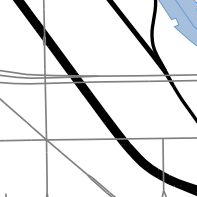

In [23]:
from PIL import Image
Image.open(args.control_image)